### PART 1: 

#### HOW TO CLEAN DATA WITH PYTHON
#### Cleaning US Census Data
You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple csv files. They didn’t use pandas, they would just look through these csv files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into pandas and into reasonable shape so that you can make these histograms?

#### Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

In [199]:
import numpy as np
import pandas as pd
import glob
from decimal import *
import matplotlib.pyplot as plt

Open some of the census csv files in the navigator. How are they named? What kind of information do they hold? Will they help us make this graph?

2. It will be easier to inspect this data once we have it in a DataFrame. You can’t even call .head() on these csvs! How are you supposed to read them? Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.

In [214]:
all_files = glob.glob('Data_Files/states*.csv')
all_data = [pd.read_csv(eachfile,index_col=0) for eachfile in all_files]
us_census = pd.concat(all_data)

3. Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [215]:
us_census.columns, us_census.dtypes

(Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
        'Pacific', 'Income', 'GenderPop'],
       dtype='object'),
 State        object
 TotalPop      int64
 Hispanic     object
 White        object
 Black        object
 Native       object
 Asian        object
 Pacific      object
 Income       object
 GenderPop    object
 dtype: object)

4. Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats. Start to make a plan for how to convert these columns into the right types for manipulation.

In [241]:
#Using New Indexes for the combined dataframe
new_indexes = np.arange(0,len(us_census))
us_census.index = new_indexes
us_census.head(7)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.35860306644,2341093M_2489527F,2341093,2489527.0
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.74390243902,384160M_349215F,384160,349215.0
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.82095490716,3299088M_3342840F,3299088,3342840.0
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.63396778917,1451913M_1506295F,1451913,1506295.0
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.78230266465,19087135M_19334329F,19087135,19334329.0
5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787164906,2648667M_2630239F,2648667,2630239.0
6,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787164906,2648667M_2630239F,2648667,2630239.0


#### Regex to the Rescue
5. Use regex to turn the Income column into a format that is ready for conversion into a numerical type.

In [242]:
formatted_income = us_census.Income.replace('[$,]','',regex=True)

In [243]:
us_census.Income = formatted_income.map(lambda x: Decimal(x))
us_census.Income.head()

0    43296.35860306644
1    70354.74390243902
2    54207.82095490716
3    41935.63396778917
4    67264.78230266465
Name: Income, dtype: object

6. Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column. Split the column into those two new columns using str.split and separating out those results.

In [244]:
genders = us_census.GenderPop.str.split('_',expand=True)

7. Convert both of the columns into numerical datatypes. There is still an M or an F character in each entry! We should remove those before we convert.


In [245]:
us_census['Men'] = genders[0].apply(lambda x: int(x[:-1]))
us_census['Women'] = genders[1].apply(lambda x: int(x[:-1]) if(len(x) > 1) else np.nan)
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.35860306644,2341093M_2489527F,2341093,2489527.0
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.74390243902,384160M_349215F,384160,349215.0
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.82095490716,3299088M_3342840F,3299088,3342840.0
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.63396778917,1451913M_1506295F,1451913,1506295.0
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.78230266465,19087135M_19334329F,19087135,19334329.0


8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show!

Use matplotlib to make a scatterplot!

plt.scatter(the_women_column, the_income_column) 
Remember to call plt.show() to see the graph!

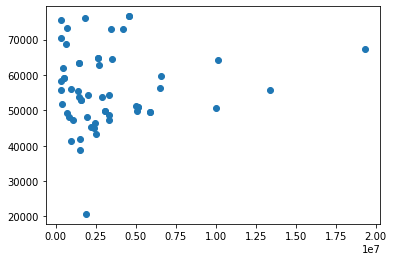

In [246]:
plt.scatter(us_census.Women, us_census.Income)
plt.show()

9. Did you get an error? These monstrous csv files probably have nan values in them! Print out your column with the number of women per state to see.

We can fill in those nans by using pandas’ .fillna() function.

You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.

Print out the Women column after filling the nan values to see if it worked!

In [247]:
us_census[us_census.Women.isna()].head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
23,Maryland,5930538,8.47249820014399%,52.679049676026%,30.6777537796976%,0.20309575233981278%,5.325413966882652%,0.03628509719222463%,78765.40072463769,2872643M_F,2872643,NaN
24,Maryland,5930538,8.47249820014399%,52.679049676026%,30.6777537796976%,0.20309575233981278%,5.325413966882652%,0.03628509719222463%,78765.40072463769,2872643M_F,2872643,NaN
31,Montana,1014699,3.2688888888888896%,86.41555555555554%,0.4292592592592591%,7.0607407407407425%,0.5703703703703705%,0.07222222222222222%,47645.682835820895,510163M_F,510163,NaN


In [249]:
us_census.Women = us_census.Women.fillna(us_census.TotalPop-us_census.Men)
#Having Lenght of the following list 0 is indicating that no nan values are remaining in the Women Column
print(len(us_census[us_census.Women.isna()]))
us_census.head()

0


,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.35860306644,2341093M_2489527F,2341093,2489527.0
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.74390243902,384160M_349215F,384160,349215.0
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.82095490716,3299088M_3342840F,3299088,3342840.0
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.63396778917,1451913M_1506295F,1451913,1506295.0
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.78230266465,19087135M_19334329F,19087135,19334329.0


10. We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.

In [253]:
us_census[us_census.duplicated('State')]

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
6,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787164906,2648667M_2630239F,2648667,2630239.0
12,Georgia,10006693,8.418242207460397%,54.28630556974962%,32.08829841594277%,0.18758303525804798%,3.0976494634644895%,0.046601941747572824%,50811.08205128205,4883331M_5123362F,4883331,5123362.0
18,Iowa,3093526,5.30364520048603%,87.71968408262464%,3.2569866342648868%,0.2897934386391251%,1.699392466585662%,0.055164034021871235%,53017.75304136253,1534595M_1558931F,1534595,1558931.0
24,Maryland,5930538,8.47249820014399%,52.679049676026%,30.6777537796976%,0.20309575233981278%,5.325413966882652%,0.03628509719222463%,78765.40072463769,2872643M_F,2872643,3057895.0
30,Missouri,6045448,4.037247838616718%,77.508069164265%,14.122118155619594%,0.36332853025936646%,1.6244956772334296%,0.10165706051873193%,49763.98772563177,2964003M_3081445F,2964003,3081445.0
36,New Jersey,8904413,18.74950049950049%,56.488761238761285%,14.387862137862117%,0.11533466533466513%,8.159990009990018%,0.031318681318681325%,76581.08341708542,4343027M_4561386F,4343027,4561386.0
42,Ohio,11575977,3.6720843250595037%,75.90306018361096%,16.207276436586163%,0.16888813328799712%,1.6210812648758952%,0.022645358721523304%,49655.24846625767,5662893M_5913084F,5662893,5913084.0
48,Rhode Island,1053661,13.356666666666678%,74.32541666666665%,5.68291666666667%,0.3462500000000001%,3.2474999999999983%,0.035833333333333335%,59125.270833333336,510388M_543273F,510388,543273.0
54,Utah,2903379,13.468376068376063%,79.40683760683764%,1.0179487179487194%,1.0813675213675222%,2.196068376068376%,0.8259829059829059%,63488.91780821918,1459229M_1444150F,1459229,1444150.0


11. Drop those duplicates using the .drop_duplicates() function.

In [261]:
us_census.drop_duplicates(inplace=True)
us_census.duplicated().value_counts()#having no True Value indicates that there are no remaining duplicated states in data

False    51
dtype: int64

12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

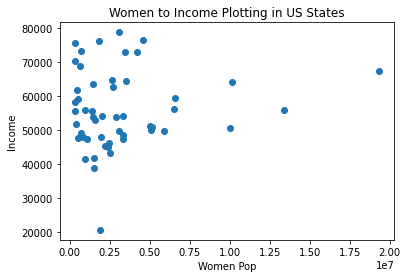

In [266]:
plt.title('Women to Income Plotting in US States')
plt.scatter(us_census.Women, us_census.Income)
plt.xlabel('Women Pop')
plt.ylabel('Income')
plt.show()

#### Histograms of Races
13. Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.

In [267]:
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')

14. Try to make a histogram for each one!

You will have to get the columns into numerical format, and those percentage signs will have to go.

Don’t forget to fill the nan values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.

#### Get Creative
15. Phew. You’ve definitely impressed your boss on your first day of work.

But is there a way you really convey the power of pandas and Python over the drudgery of csv and Excel?

Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you’ve been searching for.

In [269]:
cols = ['Hispanic','White','Black','Native','Asian']

for each_col in cols:
    formatted_values = us_census[each_col].replace('[%,]','',regex=True)
    us_census[each_col] = formatted_values.map(lambda x: Decimal(x) if len(x) > 1 else np.nan)

us_census.Pacific = us_census.Pacific.replace('[%,]','',regex=True)
us_census.Pacific = us_census.Pacific.map(lambda x: Decimal(x) if (type(x) == type('')) else np.nan)

print(us_census.dtypes)

State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
Men            int64
Women        float64
dtype: object


In [270]:
us_census['Pacific'] = us_census['Pacific'].fillna(100 - (us_census['Hispanic'] +us_census['Black']+us_census['White']+us_census['Native']+us_census['Asian']  ))
us_census.Pacific.isna().value_counts()

False    51
Name: Pacific, dtype: int64

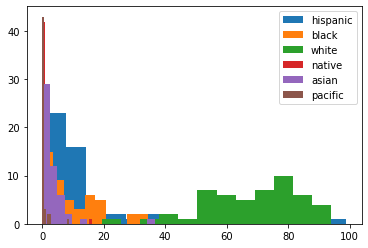

In [271]:
plt.hist(us_census.Hispanic, bins=15, label= "hispanic")
plt.hist(us_census.Black, bins=15,label= "black")
plt.hist(us_census.White, bins=15,label= "white")
plt.hist(us_census.Native, bins=15,label= "native")
plt.hist(us_census.Asian, bins=15,label= "asian")
plt.hist(us_census.Pacific, bins=15, label= "pacific")
plt.legend()
plt.show()

## PART 2:

#### LEARN DATA ANALYSIS WITH PANDAS
#### Petal Power Inventory
You’re the lead data analyst for a chain of gardening stores called Petal Power. Help them analyze their inventory!


Answer Customer Emails

1. Data for all of the locations of Petal Power is in the file inventory.csv. Load the data into a DataFrame called inventory.

In [274]:
inventory = pd.read_csv('Data_Files/inventory.csv')

2. Inspect the first 10 rows of inventory.

In [276]:
inventory.head(10)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


3. The first 10 rows represent data from your Staten Island location. Select these rows and save them to staten_island.

In [287]:
staten_island = inventory.head(10)

4. A customer just emailed you asking what products are sold at your Staten Island location. Select the column product_description from staten_island and save it to the variable product_request.

In [288]:
product_request = staten_island.product_description
product_request

0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object

5. Another customer emails to ask what types of seeds are sold at the Brooklyn location. Select all rows where location is equal to Brooklyn and product_type is equal to seeds and save them to the variable seed_request

In [289]:
mask = (inventory.location == 'Brooklyn') & (inventory.product_type == 'seeds')
seed_request = inventory[mask]
seed_request

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99


#### Inventory
6. Add a column to inventory called in_stock which is True if quantity is greater than 0 and False if quantity equals 0.

In [293]:
inventory['in_stock'] = inventory.quantity.apply(lambda x: True if (x > 0) else False)
inventory.head()

,location,product_type,product_description,quantity,price,in_stock
0,Staten Island,seeds,daisy,4,6.99,True
1,Staten Island,seeds,calla lily,46,19.99,True
2,Staten Island,seeds,tomato,85,13.99,True
3,Staten Island,garden tools,rake,4,13.99,True
4,Staten Island,garden tools,wheelbarrow,0,89.99,False


7. Petal Power wants to know how valuable their current inventory is. Create a column called total_value that is equal to price multiplied by quantity.

In [296]:
inventory['total_value'] = inventory.apply(lambda x: (x.price * x.quantity), axis=1)
inventory.head()

,location,product_type,product_description,quantity,price,in_stock,total_value
0,Staten Island,seeds,daisy,4,6.99,True,27.96
1,Staten Island,seeds,calla lily,46,19.99,True,919.54
2,Staten Island,seeds,tomato,85,13.99,True,1189.15
3,Staten Island,garden tools,rake,4,13.99,True,55.96
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00


8. The Marketing department wants a complete description of each product for their catalog.

The following lambda function combines product_type and product_description into a single string:

combine_lambda = lambda row: \
    '{} - {}'.format(row.product_type,
                     row.product_description)
Paste this function into script.py.

In [298]:
combine_lambda = lambda row: '{} - {}'.format(row.product_type, row.product_description)

9. Using combine_lambda, create a new column in inventory called full_description that has the complete description of each product.

In [299]:
inventory['full_description'] = inventory.apply(combine_lambda, axis=1)
inventory.head()

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,True,55.96,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,garden tools - wheelbarrow
